In [4]:
from pathlib import Path
import easyidp as idp

In [6]:
NAS_ROOT = Path("/home/crest/w/hwang_Pro/data/202509_tanashi_broccoli")

In [7]:
dom_path = NAS_ROOT / "03_metashape.psx" / "outputs" / "20250918" / "20250918_dom.tif"

In [3]:
dom = idp.GeoTiff(dom_path)

In [8]:
roi_path = NAS_ROOT / "02_GIS" / "roi_grid.shp"

In [9]:
roi = idp.ROI(roi_path)

[shp][proj] Use projection [WGS 84 / UTM zone 54N] for loaded shapefile [roi_grid.shp]


[shp] Read shapefile [roi_grid.shp]: 100%|██████████| 260/260 [00:00<00:00, 211095.44it/s]


In [10]:
roi

<easyidp.ROI> with 260 items
[0]	0
array([[ 368167.27948821, 3956028.98457495],
       [ 368165.39828354, 3956028.58471255],
       [ 368164.98653489, 3956030.52183763],
       [ 368166.86773957, 3956030.92170003],
       [ 368167.27948821, 3956028.98457495]], shape=(5, 2))
[1]	1
array([[ 368166.86773957, 3956030.92170003],
       [ 368164.98653489, 3956030.52183763],
       [ 368164.57478624, 3956032.45896272],
       [ 368166.45599092, 3956032.85882512],
       [ 368166.86773957, 3956030.92170003]], shape=(5, 2))
...
[258]	258
array([[ 368140.46667858, 3956071.8768154 ],
       [ 368138.58547391, 3956071.476953  ],
       [ 368138.17372526, 3956073.41407809],
       [ 368140.05492994, 3956073.81394049],
       [ 368140.46667858, 3956071.8768154 ]], shape=(5, 2))
[259]	259
array([[ 368140.05492994, 3956073.81394049],
       [ 368138.17372526, 3956073.41407809],
       [ 368137.76197661, 3956075.35120317],
       [ 368139.64318129, 3956075.75106557],
       [ 368140.05492994, 3956073.8

In [11]:
roi[0]

array([[ 368167.27948821, 3956028.98457495],
       [ 368165.39828354, 3956028.58471255],
       [ 368164.98653489, 3956030.52183763],
       [ 368166.86773957, 3956030.92170003],
       [ 368167.27948821, 3956028.98457495]])

In [ ]:
import numpy as np

In [21]:
buffer = 0.5

In [19]:
x_min, y_min = roi[0].min(axis=0)
x_max, y_max = roi[0].max(axis=0)

In [22]:
roi_buffer = np.asarray([
    [x_min - buffer, y_min - buffer],
    [x_max + buffer, y_min - buffer],
    [x_max + buffer, y_max + buffer],
    [x_min - buffer, y_max + buffer],
    [x_min - buffer, y_min - buffer],
])

In [23]:
roi_buffer

array([[ 368164.48653489, 3956028.08471255],
       [ 368167.77948821, 3956028.08471255],
       [ 368167.77948821, 3956031.42170003],
       [ 368164.48653489, 3956031.42170003],
       [ 368164.48653489, 3956028.08471255]])

In [24]:
roi_pix = dom.geo2pixel(roi[0])
roi_pix

array([[20373.12141727, 33530.99320919],
       [19124.41811755, 33796.41328921],
       [18851.10820005, 32510.59122212],
       [20099.81149977, 32245.17114209],
       [20373.12141727, 33530.99320919]])

In [25]:
roi_buffer_pix = dom.geo2pixel(roi_buffer)
roi_buffer_pix

array([[18519.21892839, 34128.30256087],
       [20705.01068893, 34128.30256087],
       [20705.01068893, 31913.28187043],
       [18519.21892839, 31913.28187043],
       [18519.21892839, 34128.30256087]])

In [29]:
crop_no_buffer = dom.crop_polygon(roi[0], is_geo=True)

In [27]:
import matplotlib.pyplot as plt

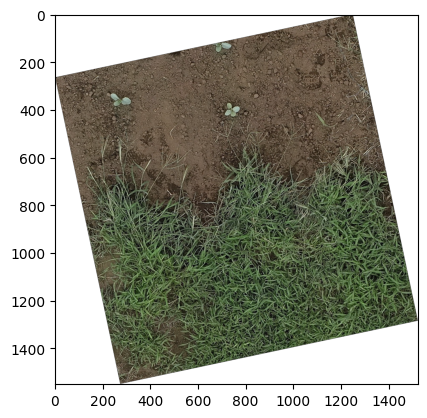

In [30]:
plt.imshow(crop_no_buffer)

In [31]:
crop_buffer = dom.crop_polygon(roi_buffer, is_geo=True)

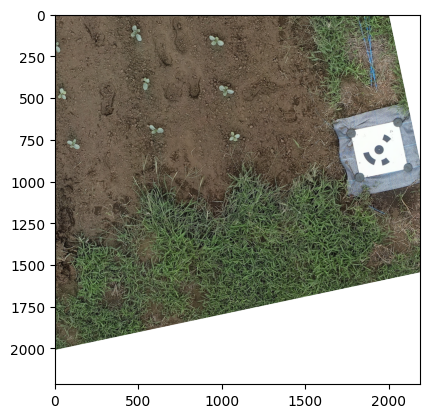

In [32]:
plt.imshow(crop_buffer)

## 循环处理

In [46]:
dom.width

20841

In [41]:
import json

In [35]:
clip_dom_folder = NAS_ROOT / "11_root_position" / "dom_part"
clip_meta_folder = NAS_ROOT / "11_root_position" / "dom_meta"

In [52]:
buffer = 0.25

for k, r in roi.items():
    roi_pix = dom.geo2pixel(r)

    x_min, y_min = roi_pix.min(axis=0)
    x_max, y_max = roi_pix.max(axis=0)

    x_min_b = max(0, x_min - buffer)
    x_max_b = min(dom.width, x_max + buffer)

    y_min_b = max(0, y_min - buffer)
    y_max_b = min(dom.height, y_max + buffer)

    roi_buffer_pix = np.asarray([
        [x_min_b, y_min_b],
        [x_max_b, y_min_b],
        [x_max_b, y_max_b],
        [x_min_b, y_max_b],
        [x_min_b, y_min_b],
    ])

    crop_buffer = dom.crop_polygon(roi_buffer_pix, is_geo=False, save_path=clip_dom_folder / f"{k}.tif")

    # record offset
    x0, y0 = roi_buffer_pix.min(axis=0)

    meta_data = {
        "x0": float(x0), 
        "y0": float(y0)
    }

    with open(clip_meta_folder / f"{k}.json", "w", encoding="utf-8") as f:
        json.dump(meta_data, f, indent=4)

array([[18685.16356422, 33962.35792504],
       [20539.0660531 , 33962.35792504],
       [20539.0660531 , 32079.22650626],
       [18685.16356422, 32079.22650626],
       [18685.16356422, 33962.35792504]])